In [3]:
import warnings
warnings.filterwarnings('ignore')
import flowermd
import hoomd
import gsd
import matplotlib.pyplot as plt
import numpy as np
import gsd.hoomd
from flowermd.base import Pack, Simulation
from flowermd.library import KremerGrestBeadSpring, LJChain
from flowermd.utils import get_target_box_number_density
import unyt as u
import hoomd

cpu = hoomd.device.CPU()

/home/stephaniemccallu/miniforge3/envs/test-signac/lib/python3.11/site-packages/mdtraj/formats/__init__.py:13: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  from mdtraj.formats.trr import TRRTrajectoryFile



Support for writing out LAMMPS data files will be removed
in mbuild 1.0.
See GMSO (https://github.com/mosdef-hub/gmso/tree/main/gmso/formats/lammpsdata) for
continued support for LAMMPS.



In [4]:
mollengths = [100, 150]

In [5]:
for i in range(len(mollengths)):
    kg_chain = LJChain(lengths=mollengths[i],num_mols=20)
    ff = KremerGrestBeadSpring(bond_k=2.5,bond_max=2.5)
    ff.hoomd_forces
    cg_system = Pack(molecules=kg_chain, density=0.85*u.Unit("nm**-3"), packing_expand_factor=11,edge=2,overlap=1)
    gsd_path=(str(i+1)+'kg-melt.gsd')
    cg_sim = Simulation(
        initial_state=cg_system.hoomd_snapshot,
        forcefield=ff.hoomd_forces,
        gsd_write_freq=int(1e5/10),
        gsd_file_name=gsd_path,
    )
    target_box = get_target_box_number_density(density=0.85*u.Unit("nm**-3"),n_beads=mollengths[i]*10)
    cg_sim.run_update_volume(final_box_lengths=target_box, kT=2.0, n_steps=1e5,tau_kt=cg_sim.dt,period=10,thermalize_particles=True)
    cg_sim.run_NVT(n_steps=1e4, kT=1, tau_kt=0.06)
    cg_sim.flush_writers()
    traj = gsd.hoomd.open(str(i+1)+'kg-melt.gsd')

Initializing simulation state from a gsd.hoomd.Frame.
Step 5500 of 100000; TPS: 1982.71; ETA: 0.8 minutes
Step 11000 of 100000; TPS: 2517.65; ETA: 0.6 minutes
Step 16500 of 100000; TPS: 2865.53; ETA: 0.5 minutes
Step 22000 of 100000; TPS: 3154.01; ETA: 0.4 minutes
Step 27500 of 100000; TPS: 3351.15; ETA: 0.4 minutes
Step 33000 of 100000; TPS: 3603.7; ETA: 0.3 minutes
Step 38500 of 100000; TPS: 3866.83; ETA: 0.3 minutes
Step 44000 of 100000; TPS: 4164.58; ETA: 0.2 minutes
Step 49500 of 100000; TPS: 4433.04; ETA: 0.2 minutes
Step 55000 of 100000; TPS: 4683.59; ETA: 0.2 minutes
Step 60500 of 100000; TPS: 4950.38; ETA: 0.1 minutes
Step 66000 of 100000; TPS: 5201.97; ETA: 0.1 minutes
Step 71500 of 100000; TPS: 5461.55; ETA: 0.1 minutes
Step 77000 of 100000; TPS: 5712.86; ETA: 0.1 minutes
Step 82500 of 100000; TPS: 5963.86; ETA: 0.0 minutes
Step 88000 of 100000; TPS: 6207.3; ETA: 0.0 minutes
Step 93500 of 100000; TPS: 6441.94; ETA: 0.0 minutes
Step 99000 of 100000; TPS: 6670.42; ETA: 0.0 min

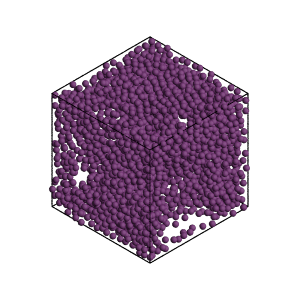

In [10]:
from cmeutils.visualize import FresnelGSD

sim_visualizer = FresnelGSD(
    gsd_file="2kg-melt.gsd", frame=10, view_axis=(1, 1, 1)
)
sim_visualizer.view()